In [441]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

In [442]:
file = fits.open('../data/uv_test/at2024tvd.fits')
data = file[1].data

In [443]:
vis = np.array(data)

In [444]:
vis

array([(0, 18,  0, 420.6604   , -275.8114   , 86699.3    ),
       (0, 19,  0,  24.46373  ,  -94.33884  , 32877.39   ),
       (0, 20,  0, 145.33069  ,   -2.4174213, 40204.633  ), ...,
       (1,  7, 50,   6.2507386,  -45.22141  ,  1108.3508 ),
       (1,  8, 50, -27.927786 ,  -17.995735 ,   601.1217 ),
       (1,  9, 50,   7.941753 ,  -14.429062 ,   148.72305)],
      dtype=(numpy.record, [('Frequency bin', '>i4'), ('indexU', '>i2'), ('indexV', '>i2'), ('Re', '>f4'), ('Im', '>f4'), ('Weight', '>f4')]))

In [445]:
freq_bin, u, v, Re, Im, w = [], [], [], [], [], []
for row in vis:
    freq_bin_data, u_data, v_data, Re_data, Im_data, w_data = row
    freq_bin.append(int(freq_bin_data))
    u.append(int(u_data))
    v.append(int(v_data))
    Re.append(float(Re_data))
    Im.append(float(Im_data))
    w.append(float(w_data))

Text(0, 0.5, 'v (klambda)')

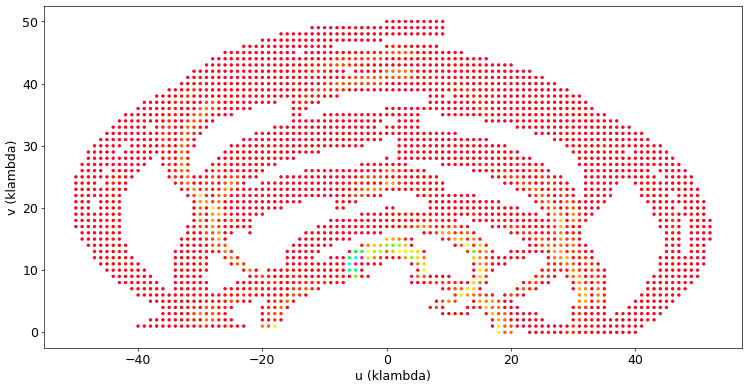

In [446]:
fig=plt.figure(figsize=(15,8))
ax=fig.add_subplot(111)
ax.scatter(u,v, c=w, marker='.', cmap='gist_rainbow')
ax.set_aspect(aspect=1.0)
ax.set_xlabel('u (klambda)')
ax.set_ylabel('v (klambda)')

In [447]:
Rlambda = [float(tup[1]**2 + tup[2]**2)**(1/2) for tup in vis]

In [448]:
Rlambda

[18.0,
 19.0,
 20.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 17.029386365926403,
 18.027756377319946,
 19.026297590440446,
 20.024984394500787,
 21.02379604162864,
 22.02271554554524,
 23.021728866442675,
 24.020824298928627,
 25.019992006393608,
 26.019223662515376,
 27.018512172212592,
 28.0178514522438,
 29.017236257093817,
 30.01666203960727,
 31.016124838541646,
 32.01562118716424,
 33.015148038438355,
 34.0147027033899,
 35.014282800023196,
 36.013886210738214,
 37.013511046643494,
 38.01315561749642,
 39.01281840626232,
 40.01249804748511,
 41.012193308819754,
 40.01249804748511,
 39.01281840626232,
 38.01315561749642,
 37.013511046643494,
 36.013886210738214,
 35.014282800023196,
 34.0147027033899,
 33.015148038438355,
 32.01562118716424,
 31.016124838541646,
 30.01666203960727,
 29.017236257093817,
 28.0178514522438,
 27.018512172212592,
 26.019223662515376,
 25.019992006393608,
 24.02082429

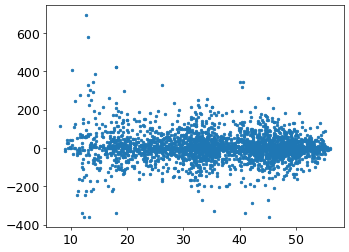

In [449]:
plt.scatter(Rlambda, Re, marker='.')

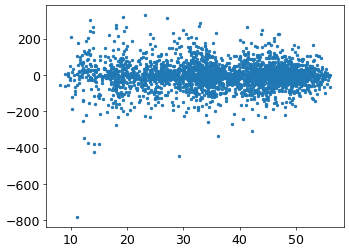

In [450]:
plt.scatter(Rlambda, Im, marker='.')

In [451]:
def chi_squared(y_and_sd, const):
    chi2 = 0
    for tup in y_and_sd:
        y, sd = tup
        chi2 += ((y-const)/sd)**2
    return chi2

In [452]:
sd = [weight**(-1/2) for weight in w]

In [453]:
sd

[0.0033961918254073646,
 0.005515073810733484,
 0.004987259312731655,
 0.03129190050450523,
 0.012147837352246478,
 0.008199217303882345,
 0.008019914614932983,
 0.0103914798717828,
 0.010382198273979158,
 0.006761283238416424,
 0.0066106272137981155,
 0.01760037634957116,
 0.00787328690154773,
 0.01066153733185766,
 0.011337999610976908,
 0.01043312390589728,
 0.017389318013156883,
 0.013397191378422062,
 0.01340207720194152,
 0.026339541790907427,
 0.93744876828872,
 0.03204922233807946,
 0.0033145167289326117,
 0.005396351127399852,
 0.005660737254948516,
 0.09544975924039906,
 0.02971025524584804,
 0.017381621780791816,
 0.012516636624279237,
 0.016423200315145058,
 0.015603562313484587,
 0.02568614164554819,
 0.5299983231041145,
 0.017441077494215893,
 0.006389132128986278,
 0.008834318064077322,
 0.011770834806530012,
 0.008440873668892982,
 0.01752704121596116,
 0.023331854537838127,
 0.010904599460150037,
 0.011089277660575488,
 0.02307475078771016,
 0.012135899848194355,
 0.01

In [454]:
Re

[420.660400390625,
 24.463729858398438,
 145.3306884765625,
 1.4353742599487305,
 99.32071685791016,
 29.97675323486328,
 10.723037719726562,
 7.46095085144043,
 -19.78506088256836,
 82.82843017578125,
 -81.6447982788086,
 12.161321640014648,
 -151.88356018066406,
 58.52473831176758,
 76.0383071899414,
 212.15347290039062,
 28.16849136352539,
 23.386930465698242,
 51.29425811767578,
 -1.0430479049682617,
 0.09654328227043152,
 1.3312397003173828,
 -116.59430694580078,
 -5.145416259765625,
 92.46511840820312,
 -28.447900772094727,
 -16.199514389038086,
 -19.707271575927734,
 -88.34178161621094,
 -81.03451538085938,
 -7.469972610473633,
 9.812102317810059,
 -0.5785496234893799,
 -7.109119415283203,
 -35.621726989746094,
 -109.98611450195312,
 20.771347045898438,
 -96.97109985351562,
 -34.81730270385742,
 -16.37796401977539,
 -127.62370300292969,
 56.627235412597656,
 8.096104621887207,
 -0.9073810577392578,
 -3.6242637634277344,
 20.385025024414062,
 0.09654328227043152,
 -1.043047904968

In [455]:
uv_dat = []
for i in range(len(sd)):
    uv_dat.append((Re[i], sd[i]))

In [456]:
from scipy.optimize import curve_fit

In [457]:
zeroes = [0]*len(uv_dat)

In [458]:
popt, pcov = curve_fit(chi_squared, uv_dat, zeroes)

In [459]:
popt

array([21.12557632])

In [460]:
pcov

array([[5.20681602e+11]])

In [461]:
chi2_val = chi_squared(uv_dat, float(popt))

/var/folders/3j/z5bj43t10vsdnks2s1xw3vm80000gn/T/ipykernel_44462/1371207302.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  chi2_val = chi_squared(uv_dat, float(popt))


In [462]:
df = len(uv_dat) - 1
alpha = 0.01

In [463]:
from scipy.stats import chi2
crit_val = chi2.ppf(q=1-alpha, df=df)

In [464]:
crit_val

np.float64(2965.6812142441727)

In [465]:
chi2_val / crit_val

np.float64(214257355.6826301)

In [466]:
from find_source import summary

{'field_center': (0, 0),
 'rms_val': 0.00012459907156880945,
 'mad': 8.437581709586084e-05,
 'sd_mad': 0.00012440247822720807,
 'n_incl_meas': 18.067356765121,
 'n_excl_meas': 827.7424874767748,
 'fwhm': 3.47508468,
 'incl_radius': 8.47508468,
 'neg_peak': -0.000479929061839357,
 'int_peak_val': [0.0006192037835717201],
 'int_peak_coord': [(0.0, -1.208582849104081)],
 'int_prob': [8.394904258738624e-06],
 'int_snr': [4.969569803172785],
 'ext_peak_val': 'No significant external peak',
 'ext_peak_coord': 'No significant external peak',
 'ext_prob': 'No significant external peak',
 'ext_snr': 'No significant external peak',
 'calc_rms_val': 0.00017520653373480203,
 'neg_peak_rms_val': 0.00015786357421749794,
 'calc_ext_prob': 0.31459587458578914,
 'calc_ext_snr': 3.0336419131631027,
 'calc_int_prob': [0.0007920004356543058],
 'calc_int_snr': [3.922398100011385],
 'conservative_rms': 0.00017520653373480203,
 'conservative_snr': 3.534}

<Figure size 384x288 with 0 Axes>

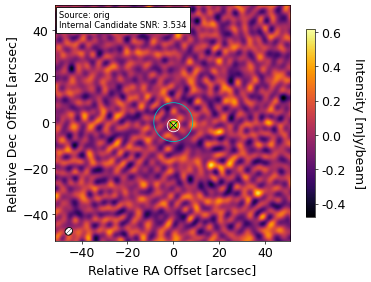

In [467]:
summary('../data/uv_test/orig.fits')